<a href="https://colab.research.google.com/github/HuseyinAts/Acikhack2023_TrendMiner/blob/main/offansive_or_not_with_classic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.3 MB/s eta 0:00:00


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import rankdata

import re
import sys
from nltk.stem.porter import PorterStemmer
from emot.emo_unicode import UNICODE_EMOJI
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import matplotlib
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

import json
import pandas as pd
import random
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import f1_score, classification_report
from spacy.tokenizer import Tokenizer
from spacy.lang.tr import Turkish
import numpy as np
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
import joblib

In [ ]:
dft = pd.read_excel("/content/final.xlsx")  
dft.fillna(0, inplace=True)

In [ ]:
dft.head()

,text,is_offensive,target
0,çürük dişli,1.0,INSULT
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0,RACIST
2,erkekler zora gelmez,1.0,SEXIST
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0,PROFANITY
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0,OTHER


In [ ]:
import seaborn as sns
sns.countplot('is_offensive',data=dft['text'])

TypeError: ignored

In [ ]:
dft.shape

(12470, 3)

In [ ]:
dft.isnull().sum()

text            0
is_offensive    0
target          0
dtype: int64

In [ ]:
dft.drop('target',axis=1,inplace=True)

In [ ]:
dft

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0


In [ ]:
dft_offensive = dft.loc[dft['is_offensive'] == 1]

In [ ]:
dft_offensive

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
5,amını siktiğimin yarrağı,1.0
...,...,...
12335,Azıcık bile beynin olsa anlardın durumu,1.0
12336,zenciler hayata bir sıfır yenik başlar,1.0
12339,Bu Yunanlılar herşeyimizi çalmış resmen,1.0
12341,Siyahi gençler potansiyel suçlu olarak görünme...,1.0


In [ ]:
dft_not_offensive = dft.loc[dft['is_offensive'] == 0]

In [ ]:
dft_not_offensive

,text,is_offensive
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0
8,makara bunu duyunca avluya çıkmış ve kızağa sa...,0.0
18,ben bunu istemedim,0.0
24,ancak bana geri dönmediler,0.0
25,özellikle büyük şehirlere aynı gün içinde deği...,0.0
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0


In [ ]:
STOPWORDS_FILEPATH = "/content/stopwords.txt"

In [ ]:
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+_:','',text)

    return text

dft['text'] = dft['text'].apply(cleanTxt)
dft

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0


In [ ]:
import nltk
nltk.download(['punkt', 'stopwords'])

import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()

import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
STOPWORDS_FILEPATH = "/content/stopwords.txt"
#SAVE_WORD_CLOUD_FILEPATH = "/content/stop.png"

In [ ]:
dft

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0


In [ ]:
def get_stopwords_list():
    s_words = []
    w_file = open(STOPWORDS_FILEPATH, encoding="utf-8")
    
    for word in w_file:
        word = word.strip()
        
        s_words.append(word)

    s_words.append("•")
    s_words.append("20212025")
    s_words.append("saat")
    s_words.append("10.00da")
    s_words.append("nde")

    w_file.close()

    return s_words

In [ ]:
# https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7


##Torku Konyaspor silinecek

def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;``')
    
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)


def handle_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' EMO_POS ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)|😉', ' EMO_POS ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', text)

    return text


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', string)


def preprocess_text(text):
    processed_text = []
    # Convert to lower case
    text = text.lower()
    
    #Clean only digits
    text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
    
    # Replaces URLs with the word URL
    #tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', text)
    
    # Replace @handle with the word USER_MENTION
    #tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    text = re.sub(r'@[\S]+', '',text)
    
    # Replaces #hashtag with hashtag
    #tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    text = re.sub(r'#(\S+)', '', text)
    
    # Remove RT (retweet)
    text = re.sub(r'\brt\b', '', text)
    
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')

    # Replace emojis with either EMO_POS or EMO_NEG
    #tweet = handle_emojis(tweet)
    text = remove_emoji(text)
   
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    #my custom chars
    text = text.replace('₺','')
    text = text.replace('=','')
    text = text.replace('’','')
    text = text.replace('|','')
    text = text.replace('‘','')
    text = text.replace('/','')
    text = text.replace('…','')
    text = text.replace('–','')
    text = text.replace('&','')
    text = text.replace('“','')
    text = text.replace('”','')
    text = text.replace('+','')
    text = text.replace('%','')
    text = text.replace('@','')
    text = text.replace('#','')
    text = text.replace('i̇','i')

    words = word_tokenize(text) #tweet.split()

    for word in words:
      word = preprocess_word(word)
      #if is_valid_word(word):
      #    processed_tweet.append(word)
      processed_text.append(word)

    return ' '.join(processed_text)

In [ ]:
def generate_word_cloud_from_frequencies(freq_dict, status):
    
    # adding movie script specific stopwords
    stop_words = get_stopwords_list()

    #print(stop_words)

    #print(len(fdist_filtered))

    wordcloud = WordCloud(
        width=1200, 
        height=800, 
        background_color="black", 
        max_words=200, 
        min_font_size=10,
        stopwords = stop_words).generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

    wordcloud.to_file(SAVE_WORD_CLOUD_FILEPATH.format(status))

In [ ]:
stop_words = get_stopwords_list()
len(stop_words)

290

In [ ]:
dft

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0
...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentences = word_tokenize("I love to learn NLP \n 'a :(")
#for i in range(len(sentences)):
sentences = [word.lower() for word in sentences if re.match('^[a-zA-Z]+', word)]  
sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'love', 'to', 'learn', 'nlp', 'a']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dft['text'], 
                                                    dft['is_offensive'], 
                                                    random_state=42)

print('Number of rows in the total set: {}'.format(dft.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 12470
Number of rows in the training set: 9352
Number of rows in the test set: 3118


In [ ]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [ ]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [ ]:
# make a list of models
models = [MultinomialNB(), DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier(), KNeighborsClassifier(),KMeansClassifier()]

NameError: ignored

In [ ]:
re = pipeline(models, training_data, y_train, testing_data, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 2.17 sec
----------------------------------------------------
Training LinearSVC
Training LinearSVC finished in 0.07 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 0.50 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 9.26 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 14.89 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 0.59 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.05 sec
------------------------------------

In [ ]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [ ]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,MultinomialNB,0.890956,0.892295,0.964190,0.926850,0.001469,0.971450,0.966507,0.994628,0.980366,0.011052
1,LinearSVC,0.882296,0.896391,0.944942,0.920026,0.000823,0.999465,0.999255,1.000000,0.999627,0.073415
2,SGDClassifier,0.881334,0.896596,0.943151,0.919284,0.001137,0.997968,0.997321,0.999851,0.998584,0.046280
3,LogisticRegression,0.861450,0.865369,0.955237,0.908085,0.000994,0.982250,0.977638,0.998060,0.987744,0.590914
4,AdaBoostClassifier,0.798589,0.810278,0.938675,0.869764,0.112335,0.806245,0.817945,0.938526,0.874097,0.503215
5,RandomForestClassifier,0.810455,0.878049,0.854073,0.865895,1.770373,1.000000,1.000000,1.000000,1.000000,9.259828
6,DecisionTreeClassifier,0.780629,0.893002,0.788272,0.837375,0.016713,1.000000,1.000000,1.000000,1.000000,2.166513
7,BaggingClassifier,0.762348,0.898133,0.753805,0.819664,0.160553,0.969632,0.994911,0.962548,0.978462,14.891203
8,KNeighborsClassifier,0.621552,0.929153,0.510743,0.659157,3.200289,0.708191,0.956142,0.621307,0.753188,0.003155


In [ ]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.621552,0.810278,0.510743,0.659157,0.000823,0.708191,0.817945,0.621307,0.753188,0.003155
max,0.890956,0.929153,0.964190,0.926850,3.200289,1.000000,1.000000,1.000000,1.000000,14.891203


In [ ]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

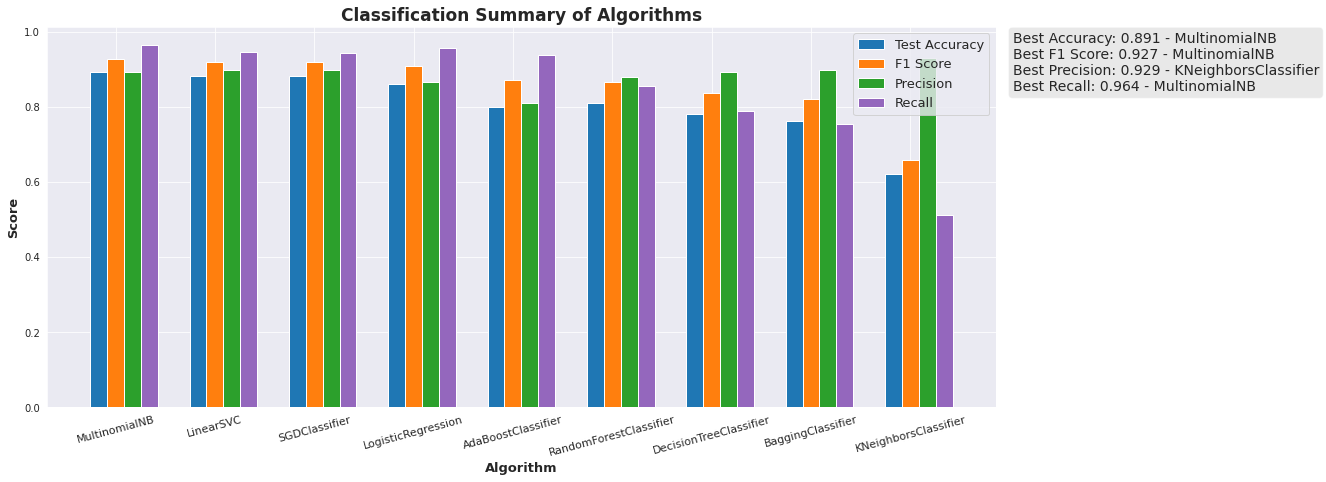

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9.2, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [ ]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

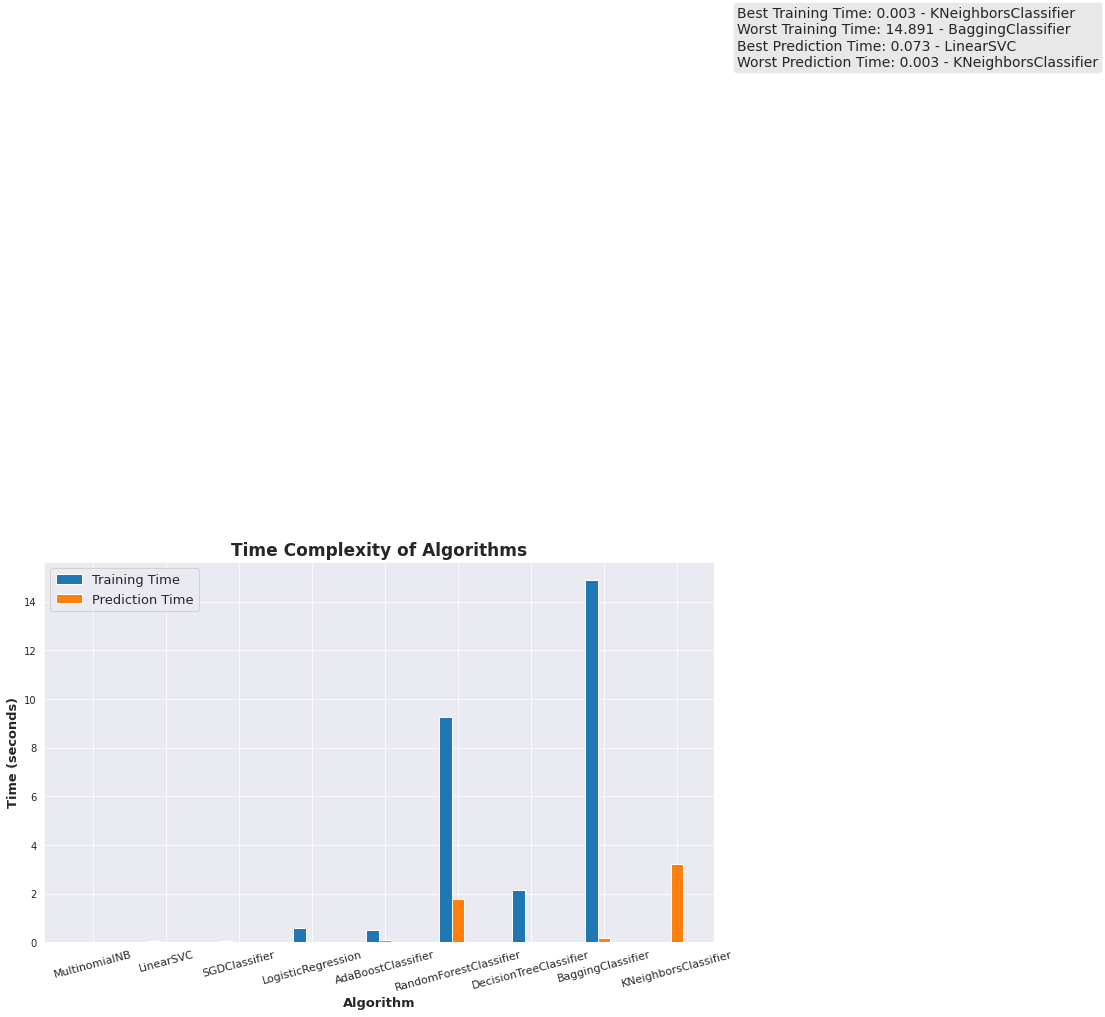

In [ ]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

In [ ]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print("Best Parameters: {}".format(grid_fit.best_params_))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print("F1-score: {:.4f}".format(f1_score(y_test, best_predictions)))
    print("Precision: {:.4f}".format(precision_score(y_test, best_predictions)))
    print("Recall: {:.4f}".format(recall_score(y_test, best_predictions)))

In [ ]:
# Dict for parameters
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)

SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0003, 'max_iter': 2500}
Accuracy: 0.8775
F1-score: 0.9179
Precision: 0.8826
Recall: 0.9561


In [ ]:
# Dict for parameters
param_grid = {
    'C': [1, 1.2, 1.3, 1.4]
}

clf_lr = LogisticRegression()

param_tuning(clf_lr, param_grid, training_data, y_train, testing_data, y_test)

LogisticRegression

Optimized Model
------
Best Parameters: {'C': 1.4}
Accuracy: 0.8672
F1-score: 0.9115
Precision: 0.8723
Recall: 0.9543


In [ ]:
param_grid = {
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 5, 8]
}

clf_dt = DecisionTreeClassifier()

param_tuning(clf_dt, param_grid, training_data, y_train, testing_data, y_test)

DecisionTreeClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 8}
Accuracy: 0.8198
F1-score: 0.8756
Precision: 0.8663
Recall: 0.8850


In [ ]:
param_grid = {
    'n_estimators': [50,150],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5]
}

clf_rf = RandomForestClassifier()

param_tuning(clf_rf, param_grid, training_data, y_train, testing_data, y_test)

RandomForestClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.8342
F1-score: 0.8873
Precision: 0.8645
Recall: 0.9114


In [ ]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_linsvc = LinearSVC()

param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)

LinearSVC

Optimized Model
------
Best Parameters: {'C': 0.5}
Accuracy: 0.8820
F1-score: 0.9202
Precision: 0.8923
Recall: 0.9499


In [ ]:
# Dict for parameters
param_grid = {
     'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)

SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0002, 'max_iter': 3000}
Accuracy: 0.8829
F1-score: 0.9209
Precision: 0.8928
Recall: 0.9508


In [ ]:
filename = 'cb_sgd_final.sav'
joblib.dump(clf_sgd, filename)

['cb_sgd_final.sav']

2. ÖRNEK


In [ ]:
pip install --force-reinstall transformers==4.20.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 KB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.6 MB/s eta 0:00:00
  Using cached numpy-1.24.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached huggingface_hub-0.13.2-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 KB 40.3 MB/s eta 0:00:00
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q pyicu
!pip install -q pycld2
!pip install -q polyglot
!pip install -q textstat
!pip install -q googletrans

In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import gc
import re
import folium
import textstat
from scipy import stats
from colorama import Fore, Back, Style, init

import math
import numpy as np
import scipy as sp
import pandas as pd

import random
import networkx as nx
from pandas import Timestamp

from PIL import Image
from IPython.display import SVG
from keras.utils import model_to_dot

import requests
from IPython.display import HTML

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.pyplot as plt

tqdm.pandas()

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import transformers
import tensorflow as tf

from tensorflow.keras.callbacks import Callback
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding
from tensorflow.keras.layers import LSTM, GRU, Conv1D, SpatialDropout1D

from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import constraints
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.activations import *
from tensorflow.keras.constraints import *
from tensorflow.keras.initializers import *
from tensorflow.keras.regularizers import *

from sklearn import metrics
from sklearn.utils import shuffle
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer,\
                                            HashingVectorizer

from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer  

import nltk
from textblob import TextBlob

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from googletrans import Translator
from nltk import WordNetLemmatizer
from polyglot.detect import Detector
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stopword=set(STOPWORDS)

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

np.random.seed(0)

In [ ]:
import sys
from importlib import reload

reload(sys)

<module 'sys' (built-in)>

In [ ]:
val_data = dft = pd.read_csv("/content/valid.csv",encoding="utf-8",on_bad_lines='skip')
test_data = dft = pd.read_csv("/content/test.csv",encoding="utf-8",on_bad_lines='skip')
train_data = dft = pd.read_csv("/content/train5.csv",encoding="utf-8",on_bad_lines='skip')

In [ ]:
train_data.head()

,id,text,label
0,26418.0,Gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@USER Çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) Sn. DÜKEL; Atatürk'ün, Karma E. M. ile başl...",0
3,45908.0,Konfederasyonumuzun Aile ve Sosyal Politikalar...,0
4,12878.0,Hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1


In [ ]:
val_data.head()

,id,text,label
0,22042,@USER Öyle oluncada fıratı verirler siker belanı,1
1,12130,Eğer fikri yoksa kendi sağ mıdır? Yaşamak uğru...,0
2,37165,YSK siteden data indirmeyi epey kolaylaştırmış...,0
3,25566,@USER #TürkMetalHerAlandaZirvede ve zirvede ka...,0
4,24875,"@USER Baktım, a eki dişil için kullanılıyorsa,...",0


In [ ]:
test_data.head()

,id,text,label
0,41993.0,@USER Sayın başkanım bu şekilde devam inşallah👏,0
1,23000.0,"Herkes gevşekliği kadar duyar kasıyor,hayat bö...",0
2,42478.0,Olgun ilişkisi olan arkadaş size en güzel hedi...,0
3,21748.0,@USER @USER Burada atıp tutacağına o kötü koşu...,1
4,13607.0,@USER İşte o onur dediğin sende yok sorun o işte,1


In [ ]:
val = val_data
train = train_data

def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

val_data["text"] = clean(val["text"])
test_data["text"] = clean(test_data["text"])
train_data["text"] = clean(train["text"])

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
strategy = tf.distribute.experimental.TPUStrategy(tpu)

GCS_DS_PATH = KaggleDatasets().get_gcs_path('jigsaw-multilingual-toxic-comment-classification')

EPOCHS = 2
BATCH_SIZE = 32 * strategy.num_replicas_in_sync

NameError: ignored

In [ ]:
dft

,id,text,label
0,26418.0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@user çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) sn. dükel; atatürk'ün, karma e. m. ile başl...",0
3,45908.0,konfederasyonumuzun aile ve sosyal politikalar...,0
4,12878.0,hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1
...,...,...,...
42393,NaN,takım otobüsüne saldırmak nedir ulan şerefini ...,1
42394,NaN,@nightmareess_ aynı bu şekldiyedim ya başlica...,1
42395,NaN,@prodbyjaysou @kkesbekes ya kaybol twitimden k...,1
42396,NaN,@82_6363ab ben hdpliyim ve vermeyecem ama akp ...,1


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')

batch_sentences = [
    "Merhaba Dünya",
    "Yagmur sonrası süper"
]
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="tf")


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')

batch_sentences = [
    "Merhaba cok iyiyim"]
  
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="tf")

In [ ]:
tokenizer.enable_padding(max_length)

x_train = fast_encode(train.text.astype(str), 
                      fast_tokenizer, max_length=512)
x_valid = fast_encode(val_text.astype(str).values, 
                      fast_tokenizer , max_length= 512)
x_test = fast_encode(test_data.content.astype(str).values, 
                     fast_tokenizer ,max_length=512)

y_valid = val.text.values
y_train = train.text.values


AttributeError: ignored

Bölüm 3 - Jigsaw Toxicity


In [ ]:
dft

,id,text,label
0,26418.0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@user çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) sn. dükel; atatürk'ün, karma e. m. ile başl...",0
3,45908.0,konfederasyonumuzun aile ve sosyal politikalar...,0
4,12878.0,hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1
...,...,...,...
42393,NaN,takım otobüsüne saldırmak nedir ulan şerefini ...,1
42394,NaN,@nightmareess_ aynı bu şekldiyedim ya başlica...,1
42395,NaN,@prodbyjaysou @kkesbekes ya kaybol twitimden k...,1
42396,NaN,@82_6363ab ben hdpliyim ve vermeyecem ama akp ...,1


In [ ]:
dfv = pd.read_csv("/content/valid.csv",encoding="utf-8",on_bad_lines='skip')

In [ ]:
dftest = pd.read_csv("/content/test.csv",encoding="utf-8",on_bad_lines='skip')

In [ ]:
dfv

,id,text,label
0,22042,@USER Öyle oluncada fıratı verirler siker belanı,1
1,12130,Eğer fikri yoksa kendi sağ mıdır? Yaşamak uğru...,0
2,37165,YSK siteden data indirmeyi epey kolaylaştırmış...,0
3,25566,@USER #TürkMetalHerAlandaZirvede ve zirvede ka...,0
4,24875,"@USER Baktım, a eki dişil için kullanılıyorsa,...",0
...,...,...,...
1751,39603,"Bu ödül sunan kızı kim giydirdiyse, kızın en b...",0
1752,26675,Bunu sana beddua olarak etmiyorum bunlar ilerd...,0
1753,17172,CHP'liler sandıkları bırakmıyor üstüne oturmuş...,1
1754,42884,karanlığın içinde yalnız kalsam ne oluuuuurr,0


In [ ]:
dft

,id,text,label
0,26418.0,gerçekten sizin hikayelerinizi izleyerek mi ye...,0
1,14473.0,@user çoook çok bi baklava bi sen zaten,0
2,16107.0,"1) sn. dükel; atatürk'ün, karma e. m. ile başl...",0
3,45908.0,konfederasyonumuzun aile ve sosyal politikalar...,0
4,12878.0,hakemler tarih yazıyorlar / 9 kişiye karşı 3-2...,1
...,...,...,...
42393,NaN,takım otobüsüne saldırmak nedir ulan şerefini ...,1
42394,NaN,@nightmareess_ aynı bu şekldiyedim ya başlica...,1
42395,NaN,@prodbyjaysou @kkesbekes ya kaybol twitimden k...,1
42396,NaN,@82_6363ab ben hdpliyim ve vermeyecem ama akp ...,1


In [ ]:
dftest

,id,text,label
0,41993.0,@USER Sayın başkanım bu şekilde devam inşallah👏,0
1,23000.0,"Herkes gevşekliği kadar duyar kasıyor,hayat bö...",0
2,42478.0,Olgun ilişkisi olan arkadaş size en güzel hedi...,0
3,21748.0,@USER @USER Burada atıp tutacağına o kötü koşu...,1
4,13607.0,@USER İşte o onur dediğin sende yok sorun o işte,1
...,...,...,...
8846,NaN,Her seyi gectim japonlari yaratan allah su bur...,1
8847,NaN,@lizzielove_w @newscomer2 @demarkesports Fan b...,1
8848,NaN,Kılıçdaroğlu'ndan pasaport çıkışı: Adam kaçırı...,1
8849,NaN,@OM21s İnşallah sonuncu olursun amına kodugumu...,1


In [ ]:
val = dfv
train = dft
test_data = dftest

In [ ]:
def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

val["text"] = clean(val["text"])
test_data["text"] = clean(test_data["text"])
train["text"] = clean(train["text"])

In [ ]:
val["text"]

0        @user öyle oluncada fıratı verirler siker belanı
1       eğer fikri yoksa kendi sağ mıdır? yaşamak uğru...
2       ysk siteden data indirmeyi epey kolaylaştırmış...
3       @user #türkmetalheralandazirvede ve zirvede ka...
4       @user baktım, a eki dişil için kullanılıyorsa,...
                              ...                        
1751    bu ödül sunan kızı kim giydirdiyse, kızın en b...
1752    bunu sana beddua olarak etmiyorum bunlar ilerd...
1753    chp'liler sandıkları bırakmıyor üstüne oturmuş...
1754         karanlığın içinde yalnız kalsam ne oluuuuurr
1755    @user ne yalan söyleyeyim bu haftalıkta fitil ...
Name: text, Length: 1756, dtype: object

In [ ]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch+1, score))

In [ ]:
def fast_encode(texts, tokenizer, chunk_size=240, maxlen=512):
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in range(0, len(texts), chunk_size):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
#AUTO = tf.data.experimental.AUTOTUNE

#tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#tf.config.experimental_connect_to_cluster(tpu)
#tf.tpu.experimental.initialize_tpu_system(tpu)
#strategy = tf.distribute.experimental.TPUStrategy(tpu)

#GCS_DS_PATH = KaggleDatasets().get_gcs_path('jigsaw-multilingual-toxic-comment-classification')

#EPOCHS = 2
#BATCH_SIZE = 32 * strategy.num_replicas_in_sync

In [ ]:
#tokenizer = transformers.DistilBertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased')

#save_path = '/kaggle/working/distilbert_base_uncased/'
#if not os.path.exists(save_path):
    #os.makedirs(save_path)
#tokenizer.save_pretrained(save_path)

#fast_tokenizer = BertWordPieceTokenizer('distilbert_base_uncased/vocab.txt', 
                                        #lowercase=True)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.


In [ ]:
!pip install transformers
import transformers
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True)
sentences = dft.text.values
max_len = 512

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x_train = fast_encode(train.text.astype(str), 
                      tokenizer, maxlen=512)
x_valid = fast_encode(dfv.text.astype(str).values, 
                      tokenizer, maxlen=512)
x_test = fast_encode(test_data.text.astype(str).values, 
                     tokenizer, maxlen=512)

y_valid = val.text.values
y_train = train.text.values

AttributeError: ignored

In [ ]:
nums_1 = train_data.sample(frac=0.1).query("toxic == 1")["flesch_reading_ease"]
nums_2 = train_data.sample(frac=0.1).query("toxic == 0")["flesch_reading_ease"]

fig = ff.create_distplot(hist_data=[nums_1, nums_2],
                         group_labels=["Toxic", "Non-toxic"],
                         colors=["darkorange", "dodgerblue"], show_hist=False)

fig.update_layout(title_text="Flesch reading ease vs. Toxicity", xaxis_title="Flesch reading ease", template="simple_white")
fig.show()


# **K MEANS**

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 14.1 MB/s eta 0:00:00


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install emot
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import torch
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

import json
import re
import numpy as np
import torch as th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 3.4 MB/s eta 0:00:00


In [ ]:
df = pd.read_excel("/content/final.xlsx")  
df.fillna(0, inplace=True)

In [ ]:
tokenize = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased', do_lower_case=True,truncation=True)
sentences = df.text.values
max_len = 250

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,
                             max_features=180000,
                             tokenizer=tokenize,
                             ngram_range=(1, 2))

In [ ]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 30 # need to be selected wisely
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters,
                               init='k-means++',
                               n_init=1,
                               init_size=1000, batch_size=1000, verbose=0, max_iter=1000)

In [ ]:
all_desc = np.append(train['item_description'].values, test['item_description'].values)
vz = vectorizer.fit_transform(list(all_desc))

NameError: ignored

In [ ]:
kmeans = kmeans_model.fit(vz)
kmeans_clusters = kmeans.predict(vz)
kmeans_distances = kmeans.transform(vz)

# #########**### GitHub**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

import string
import re
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install zeyrek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 KB 50.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.7 MB/s eta 0:00:00


In [ ]:
import nltk
import zeyrek
from nltk.tokenize import word_tokenize as wt
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import SpectralClustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import torch
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

import json
import re
import numpy as np
import torch as th

In [ ]:
### Install Hugging Face Hub
!python -m pip install huggingface_hub
!python -m pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 32.6 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
INPUT_FOLDER = '/content/final.xlsx'

In [ ]:
#data = pd.read_excel(INPUT_FOLDER ,names = ['content','category','content'])
#df = data.sample(frac = 1).reset_index(drop = True)

In [ ]:
from datasets import Features, Sequence, Value, ClassLabel
features = Features({'post': Sequence(feature={'text': Value(dtype='string'), 'upvotes': Value(dtype='int32'), 'label': ClassLabel(num_classes=7, names=[' NO_OFFENSIVE','OFFENSIVE', 'RACIST','PROFANITY','INSULT','SEXIST','OTHER'])})})
features

{'post': Sequence(feature={'text': Value(dtype='string', id=None), 'upvotes': Value(dtype='int32', id=None), 'label': ClassLabel(names=[' NO_OFFENSIVE', 'OFFENSIVE', 'RACIST', 'PROFANITY', 'INSULT', 'SEXIST', 'OTHER'], id=None)}, length=-1, id=None)}

In [ ]:
df = pd.read_excel(INPUT_FOLDER ,names = ['content','category','target'])
df = df.sample(frac = 1).reset_index(drop = True)

df['encoded_categories'] = LabelEncoder().fit_transform(df['target'])

print(df.sample(20))
print(df.groupby('target').size())

                                                 content  category     target  \
8360                      eşeği siken osuruğuna katlanır       1.0  PROFANITY   
8761                                   kişiliksiz orospu       1.0  PROFANITY   
4595          Yeşili sev doğayı koru insanları siktir er       1.0  PROFANITY   
9464           bana karşı nazik müşfik ve özverili oldun       0.0      OTHER   
10473  güneş ışınlarına maruz kalmak pigment üreten h...       0.0      OTHER   
8729                            onlar bir şey yapacaklar       0.0      OTHER   
379                                     Erkek adam yapar       1.0     SEXIST   
2645                 Evlat olsa sevilmez bu ne çirkinlik       1.0     INSULT   
7414         erkek küfredince rahatlar kadın oruspu olur       1.0     SEXIST   
11255                                         Ağlak bebe       1.0     INSULT   
2495                                       ebene atlarım       1.0  PROFANITY   
6766         koreliler gibi 

In [ ]:
df

,content,category,target,encoded_categories
0,kırmızı takım herhangi bir kuruluşun etkinliği...,0.0,OTHER,1
1,elektronik harp sahasinda kusursuz sistem yoktur,0.0,OTHER,1
2,Çalışmayan erkekten yumurta yumurtlayan tavuk ...,1.0,SEXIST,4
3,Bende talih olsaydı erkek doğardım,1.0,SEXIST,4
4,dal mısın daşşak mısın yar mısın yarrak mısın ...,1.0,PROFANITY,2
...,...,...,...,...
12465,marka tescili bir mal ürün veya hizmetin diğer...,0.0,OTHER,1
12466,Erkek kısmı karı gibi ağlamaz,1.0,SEXIST,4
12467,eşeğe Kürt demişler iki hafta saman yememiş he...,1.0,RACIST,3
12468,optik mouseu ananın amına sokarım geceleri siz...,1.0,PROFANITY,2


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
punc = string.punctuation
stop_words_turkish = sw.words('turkish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# install fast_ml library
! pip install fast_ml --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 2.0 MB/s eta 0:00:00


In [ ]:
# imports
import pandas as pd
from fast_ml.model_development import train_valid_test_split

In [ ]:
df

,content,category,target,encoded_categories
0,Afyon'un kaymağını ye de Konya'nın manyağına d...,1.0,RACIST,3
1,tas gibi bir takim,0.0,OTHER,1
2,çalışmak erkekler için şarttır,1.0,SEXIST,4
3,Sen küçük bi insansın ancak kendi dünyanda koc...,1.0,INSULT,0
4,İyiliği zerre haketmezdi,1.0,INSULT,0
...,...,...,...,...
12465,efelik yapasın mı tuttu,1.0,INSULT,0
12466,anasına bak kızını al,1.0,SEXIST,4
12467,kız gibi dövüşüyorsun,1.0,SEXIST,4
12468,tom ile nerede bulusabilirim,0.0,OTHER,1


In [ ]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased', do_lower_case=True,truncation=True)
sentences = df.content.values
max_len = 250

In [ ]:
df

,content,category,target,encoded_categories
0,Afyon'un kaymağını ye de Konya'nın manyağına d...,1.0,RACIST,3
1,tas gibi bir takim,0.0,OTHER,1
2,çalışmak erkekler için şarttır,1.0,SEXIST,4
3,Sen küçük bi insansın ancak kendi dünyanda koc...,1.0,INSULT,0
4,İyiliği zerre haketmezdi,1.0,INSULT,0
...,...,...,...,...
12465,efelik yapasın mı tuttu,1.0,INSULT,0
12466,anasına bak kızını al,1.0,SEXIST,4
12467,kız gibi dövüşüyorsun,1.0,SEXIST,4
12468,tom ile nerede bulusabilirim,0.0,OTHER,1


In [ ]:
training = df.groupby('content').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([df,training]).drop_duplicates(keep=False)

print("Training: ", len(training))
print("Test: ", len(test))

training_contents = training.content.values
training_labels = training.encoded_categories.values

Training:  12469
Test:  0


In [ ]:
input_ids = []
attention_masks = []

for content in training_contents:
    encoded_dict = tokenizer.encode_plus(
                        content,
                        truncation=True,                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_contents[0])
print('Token IDs:', input_ids[0])

Original:  domalak gözlü
Token IDs: tensor([    2, 25448, 23767, 26448,  2168,     3,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,

In [ ]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

batch_size = 32

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

number_of_categories = len(df['encoded_categories'].unique())

model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-cased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)
 
model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
epochs = 4

optimizer = AdamW(model.parameters(),
                  lr = 5e-5,
                  eps = 1e-8 
                )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: Tesla T4


In [ ]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 1903

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

======== Epoch 1 / 4 ========
Batch    10  of    312.    Elapsed: 0:00:14.
Batch    20  of    312.    Elapsed: 0:00:26.
Batch    30  of    312.    Elapsed: 0:00:37.
Batch    40  of    312.    Elapsed: 0:00:49.
Batch    50  of    312.    Elapsed: 0:01:00.
Batch    60  of    312.    Elapsed: 0:01:12.
Batch    70  of    312.    Elapsed: 0:01:24.
Batch    80  of    312.    Elapsed: 0:01:36.
Batch    90  of    312.    Elapsed: 0:01:49.
Batch   100  of    312.    Elapsed: 0:02:01.
Batch   110  of    312.    Elapsed: 0:02:13.
Batch   120  of    312.    Elapsed: 0:02:26.
Batch   130  of    312.    Elapsed: 0:02:38.
Batch   140  of    312.    Elapsed: 0:02:50.
Batch   150  of    312.    Elapsed: 0:03:03.
Batch   160  of    312.    Elapsed: 0:03:15.
Batch   170  of    312.    Elapsed: 0:03:28.
Batch   180  of    312.    Elapsed: 0:03:40.
Batch   190  of    312.    Elapsed: 0:03:53.
Batch   200  of    312.    Elapsed: 0:04:05.
Batch   210  of    312.    Elapsed: 0:04:18.
Batch   220  of    312.  

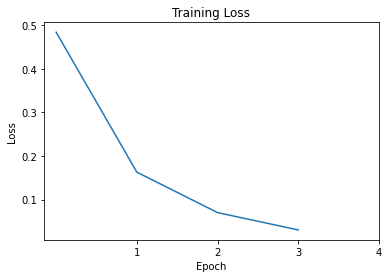

In [ ]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4])
plt.show()

In [ ]:
test_contents = test.content.values
test_labels = test.encoded_categories.values

input_ids = []
attention_masks = []

for text in test_contents:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 32  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('Prediction started on test data')
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

Prediction started on test data
Prediction completed


In [ ]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')

print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)

report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))
report = report.rename(columns={'0':'NO_OFFENSIVE',
                          '1':'OFFENSIVE',
                          '2':'RACIST',
                          '3':'PROFANITY',
                          '4':'INSULT',
                          '5':'SEXIST',
                               })

print(report)

F-Score:  0.7788500246206436
Recall:  0.7805895547146721
Precision:  0.7776603101373537
           NO_OFFENSIVE   OFFENSIVE      RACIST   PROFANITY      INSULT  \
precision      0.924276    0.941011    0.943867    0.906103    0.950704   
recall         0.866388    0.937063    0.955789    0.950739    0.973558   
f1-score       0.894397    0.939033    0.949791    0.927885    0.961995   
support      479.000000  715.000000  475.000000  406.000000  416.000000   

           SEXIST  accuracy   macro avg  weighted avg  
precision     0.0  0.934242     0.77766      0.933143  
recall        0.0  0.934242     0.78059      0.934242  
f1-score      0.0  0.934242     0.77885      0.933395  
support       3.0  0.934242  2494.00000   2494.000000  


In [ ]:
#def normalize_words(sentence): #yanlış yazılı kelimeleri düzelt
 #   analyzer = zeyrek.MorphAnalyzer()
  #  tokenize = wt(sentence)
   # res = ""
 #   for w in tokenize:
 #       lemma = analyzer.lemmatize(w)[0][1][0]
 #       res = res + lemma + " "
  #  return res
     

In [ ]:
#stop_words = ["a","aa","acaba","altı","altmış","ama","ancak","arada","artık","asla","aslında","aslında","ayrıca","az","bana","bazen","bazı","bazıları"]

In [ ]:
#from collections import Counter

def count_words(df):
  all_words = []
  for idx,rows in df.iterrows():
      text = rows.content
      all_words.extend(text.split(" "))

  words_freq = Counter(all_words)
  return words_freq


In [ ]:

# to lowercase operation for every single word

threshold = 30
words_freq = dict(filter(lambda x: x[1]>threshold, count_words(data).items()))
words = list(words_freq.keys())


bbc_dataframe = data["content"].apply(lambda x:" ".join(x.lower() for x in str(x).split()))

# punctuation remove operation
bbc_dataframe = bbc_dataframe.str.replace("[^\w\s]", "")

# number remove operation
bbc_dataframe = bbc_dataframe.str.replace("\d", "")

# türkçe stopwords'leri silmek
bbc_dataframe = bbc_dataframe.apply(lambda x : " ".join(x for x in str(x).split() if x not in stop_words_turkish and  x in words))


#bbc_dataframe = bbc_dataframe.apply(lambda sentence: normalize_words(sentence) )

# series to dataframe operation
df = pd.DataFrame(bbc_dataframe, columns = ['category','content'])
df['category'] = data['category']

In [ ]:
df['id'] = range(0, len(df['content']))

In [ ]:
# TF-IDf VECTORIZER

vec = TfidfVectorizer()
features= vec.fit_transform(df['content'])
print("Input features shape:", features.shape)
print(f"\nTake a look at the features extracted from the first news article:\n{features[0].toarray()}")

Input features shape: (12470, 24382)

Take a look at the features extracted from the first news article:
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
kmeans = KMeans(7, n_init=10, random_state=42)
kmeans.fit(features)
df['kmeans'] = kmeans.labels_

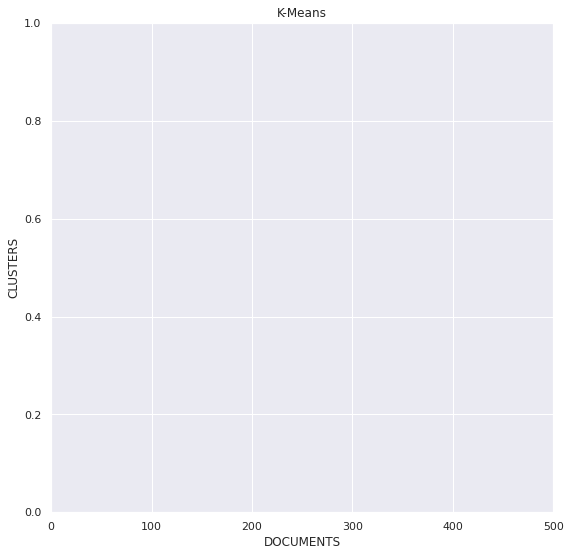

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
#plt.scatter(df['id'], df['kmeans'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('K-Means')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()

<Axes: xlabel='kmeans', ylabel='id'>

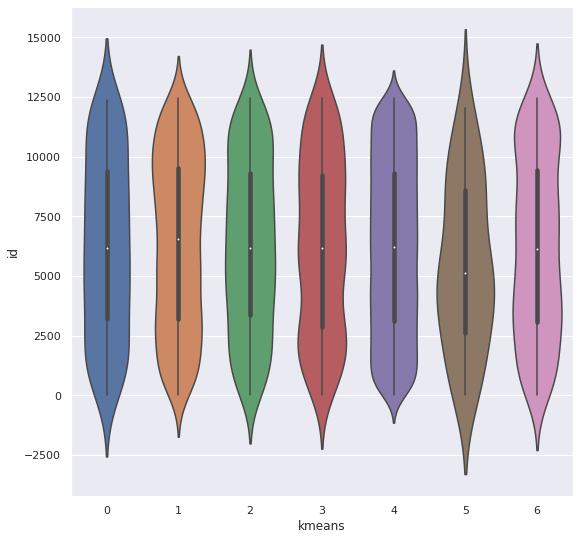

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["kmeans"], y=df['id'], data=df, orient='vertical')

In [ ]:
model = Birch(branching_factor = 50, n_clusters = 7)
model.fit(features)
pred = model.predict(features)
df['birch'] = pred

ValueError: ignored

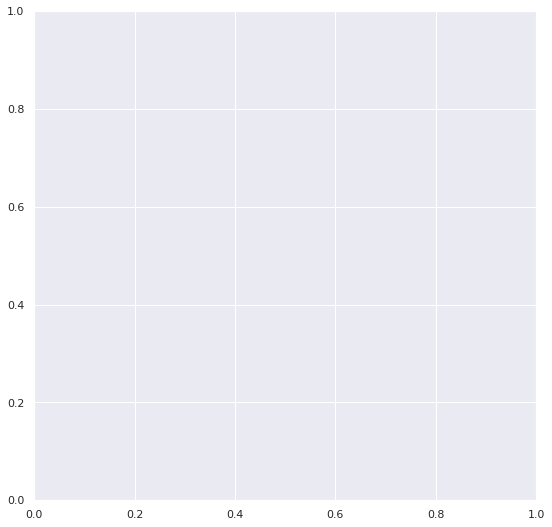

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
plt.scatter(df['id'], df['birch'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Birch')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()


<Axes: xlabel='birch', ylabel='id'>

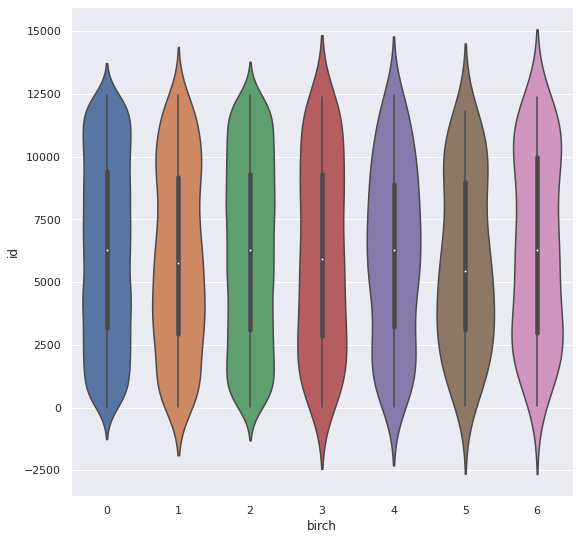

In [ ]:

sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["birch"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['birch'].value_counts()

In [ ]:
sc = SpectralClustering(n_clusters=7, assign_labels='discretize', random_state=0).fit(features)
sc.labels_
df['spectral'] = sc.labels_

NameError: ignored

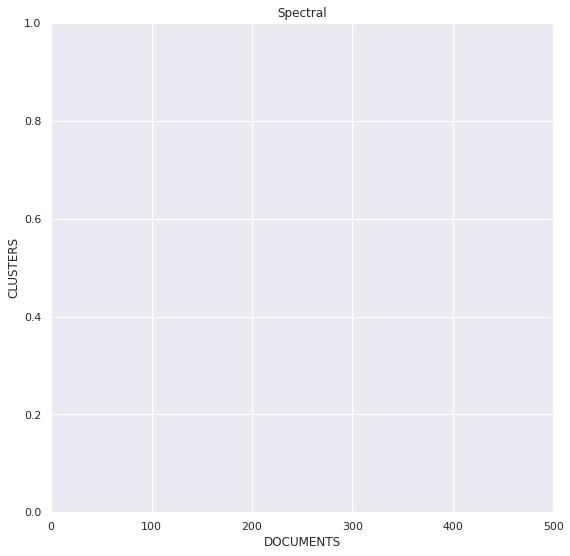

In [ ]:
area = (30 * np.random.rand(4900))**2
plt.figure(figsize=(9, 9))
#plt.scatter(df['id'], df['spectral'], c=kmeans.labels_.astype(float),s=area, alpha=0.5)
plt.title('Spectral')
plt.xlabel('DOCUMENTS')
plt.ylabel('CLUSTERS')
plt.xlim(0,500)
plt.show()

<Axes: xlabel='spectral', ylabel='id'>

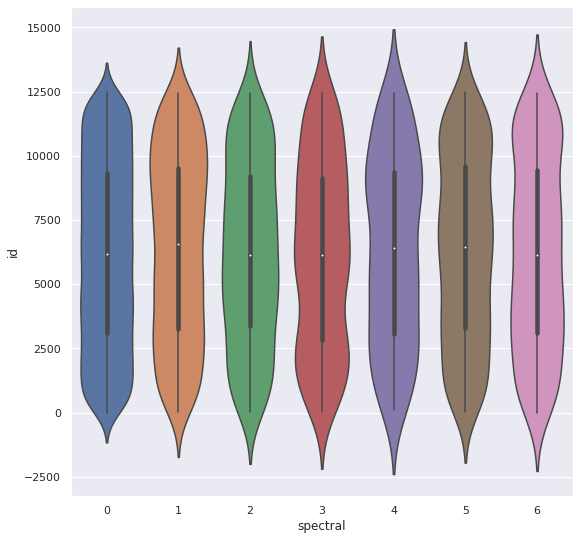

In [ ]:
sns.set(rc={'figure.figsize':(9,9)})
sns.violinplot(x=df["spectral"], y=df['id'], data=df, orient='vertical')

In [ ]:
df['kmeans'].value_counts()

1    9366
3     698
4     678
6     580
5     432
0     379
2     337
Name: kmeans, dtype: int64

In [ ]:
df['spectral'].value_counts()

In [ ]:
df['birch'].value_counts()

In [ ]:
df['category'].value_counts()

1.0    8936
0.0    3528
Name: category, dtype: int64

In [ ]:
df['category'] = df['category'].replace(['NO_OFFENSIVE'],0)
df['category'] = df['category'].replace(['OFFENSIVE'],1)
df['category'] = df['category'].replace(['RACIST'],2)
df['category'] = df['category'].replace(['PROFANITY'],3)
df['category'] = df['category'].replace(['INSULT'],4)
df['category'] = df['category'].replace(['SEXIST'],5)
df['category'] = df['category'].replace(['OTHER'],6)
df['category'].value_counts()

1.0    8936
0.0    3528
Name: category, dtype: int64

In [ ]:
df['content']

0                    Canın çıksın o yapılır mı
1               götüne girdiğim hatun benimdir
2           Çinlilerin ürettiği çakma çin malı
3        Sokak zenci çoçukları gibi ağzı bozuk
4                    Tekirdağ ayyaşların şehri
                         ...                  
12465        Kör gözünü sikeyim görmüyor musun
12466                 bu gece taarruz edilecek
12467       Erkekler ağlamaz dimdik duracaksın
12468                yapamayacağını biliyordum
12469                Siyahiler buraya oturamaz
Name: content, Length: 12470, dtype: object

In [ ]:
df = df.replace([np.inf, -np.inf], np.nan).fillna(99999)

#or
#df.replace([np.inf, -np.inf], np.nan).dropna() 

#if needed:
df = df.reset_index()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, rand_score, homogeneity_score, completeness_score, v_measure_score
import math

y_pred = df['kmeans']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))

Accuracy =  0.2508420208500401
Precision Score =  0.10602367746332869
Recall Score =  0.1065177264579362
F1 Score =  0.060350626060678356


MSE =  4811453.459983962
RMSE =  2193.5025552718103
MAE =  49.145629510825984


Rand Score =  0.5097961951252579
Homogeneity Score 0.06044719230864875
Completeness Score 0.04160285906965412
V Measure Score  0.04928514956745368


In [ ]:
y_pred = df['birch']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred)

In [ ]:

y_pred = df['spectral']
y_true = df['category']
print("Accuracy = ", accuracy_score(y_true, y_pred))
print("Precision Score = ", precision_score(y_true, y_pred, average='macro'))
print("Recall Score = ", recall_score(y_true, y_pred, average='macro'))
print("F1 Score = ", f1_score(y_true, y_pred, average='macro'))

difference_array = np.subtract(y_pred, y_true)
squared_array = np.square(difference_array)
print("\n\nMSE = ", squared_array.mean())
print("RMSE = ", math.sqrt(squared_array.mean()))
print("MAE = ", mean_absolute_error(y_true, y_pred))
print("\n\nRand Score = ", rand_score(y_true, y_pred))
print("Homogeneity Score", homogeneity_score(y_true, y_pred))
print("Completeness Score", completeness_score(y_true, y_pred))
print("V Measure Score ",v_measure_score(y_true, y_pred))ıı